In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
H = 80
S = 0.05
W = H*S*0.5
R = 0.5

I = np.zeros((H,H))
N = 9

p = np.array([0.1,0.1])
angles = np.linspace(-0.95*np.pi, 0.95*np.pi, N)

C = np.zeros((N,2))
for i,a in enumerate(angles):
    C[i,0] = np.cos(a)*R
    C[i,1] = np.sin(a)*R
    
for i in range(H):
    for j in range(H):
        x = (j-H*0.5)*S
        y = (i-H*0.5)*S
        
        r = np.sqrt(x**2+y**2)
        
        if r < R:
            I[i,j] = 1.0

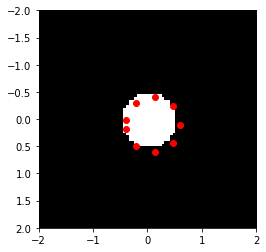

In [3]:
plt.figure()
plt.imshow(I, cmap='gray', extent=[-W, W, W, -W])
plt.scatter(C[:,0]+p[0], C[:,1]+p[1], color='r')
plt.show()

In [4]:
def point_to_index(p,H,spacing):
    j = int(p[0]/spacing+H/2)
    i = int(p[1]/spacing+H/2)
    
    return np.array([i,j])

def local_window(p, r, H, spacing):
    p1 = p-r/2
    p2 = p+r/2
    
    index1 = point_to_index(p1,H,spacing)
    index2 = point_to_index(p2,H,spacing)
    
    return np.concatenate((index1,index2))

In [10]:
point = 5
index  = point_to_index(C[point]+p,H,S)
box    = local_window(C[point]+p,0.5,H,S)

print(C[point]+p)
print(index)
print(box)

win = I[box[0]:box[2], box[1]:box[3]]
print(win.shape)

[0.46716125 0.43940037]
[48 49]
[43 44 53 54]
(10, 10)


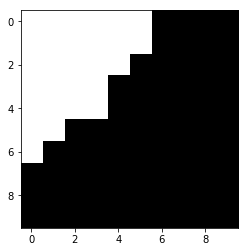

In [11]:
plt.figure()
plt.imshow(win, cmap='gray')
plt.show()

In [12]:
print(C[1])
print(C[2])
print(C[3])

[-0.30954697 -0.39265847]
[ 0.03922955 -0.49845867]
[ 0.36716125 -0.33940037]


In [30]:
v = C[1]-C[2]
print(v)
n = np.array([1,-v[0]/v[1]])
n = -n/np.linalg.norm(n)
print(n)

print(np.sum(n*v))
print(np.sum(n*C[1]))

[-0.34877652  0.1058002 ]
[-0.29028468 -0.95694034]
0.0
0.46560746737940173


In [31]:
x = np.array([0.5,0.5])
x = x-C[2]
print(x)
print(np.sum(x*n))

[0.46077045 0.99845867]
-1.0892199738727375


In [32]:
x = np.array([0,0])
x = x-C[2]
print(x)
print(np.sum(x*n))

[-0.03922955  0.49845867]
-0.46560746737940173
